# TP - Comparez le comportement du lasso et de la régression ridge

### Importer nos données

In [39]:
import pandas as pd

In [40]:
raw_data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/entrainez-un-modele-predictif-lineaire/TP_1_prostate_dataset.txt', delimiter='\t')

In [41]:
raw_data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


### Extraction des données dont on a besoin pour l'entrainement de notre modèle 

In [42]:
X = raw_data.iloc[:,1:-3]
y = raw_data.iloc[:,-2]

### Standardisation de nos données 

In [43]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
x_scale = std_scale.transform(X)


### Subdiviser notre dataset en train set et en test set 

In [44]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x_scale , y, test_size=0.25 )

### créer un regression classique sur laquelle nous allons nous basez pour nos prochaine regression

In [45]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

### Calcul de l'erreeur quadratique moyenne 

In [46]:
import numpy as np 

baseline_error = np.mean((lr.predict(X_test)-Y_test)**2)
print(baseline_error)

0.6753443374842909


## Regression ridge

##### Pour le ridge nous aurons à tester différentes paramètres

In [47]:
n_alpha = 50
alphas = np.logspace(-5, 5, 50)

ridge = linear_model.Ridge()
coefs = []
erros = []
for a in alphas :
    ridge.set_params(alpha=a)
    ridge.fit(X_train , Y_train)
    coefs.append(ridge.coef_)
    erros.append(np.mean((ridge.predict(X_test)-Y_test)**2))

In [48]:
print(erros)

[0.6753443286722397, 0.6753443233862497, 0.6753443149294052, 0.6753443013996311, 0.6753442797538586, 0.675344245123564, 0.6753441897196863, 0.6753441010805449, 0.6753439592684849, 0.6753437323842144, 0.6753433693886159, 0.6753427886141313, 0.675341859373034, 0.6753403725036674, 0.6753379931728706, 0.6753341851729688, 0.6753280893130745, 0.675318327600047, 0.6753026867394337, 0.6752776036097672, 0.6752373214253423, 0.6751724878331774, 0.6750677834813317, 0.6748978163705819, 0.6746198277311934, 0.6741604616641682, 0.6733917951481395, 0.6720903313116869, 0.6698796846268167, 0.6661988275978118, 0.6604532973119341, 0.6526572746019548, 0.6447599652785678, 0.6421149102590752, 0.653571394878373, 0.6885235804396812, 0.7510642779505811, 0.8353262792944072, 0.9273838810386169, 1.0127848693196442, 1.0827565227889666, 1.1351465507963276, 1.1719921743684518, 1.1968385633673742, 1.2131380522672992, 1.223642479487156, 1.2303360057132269, 1.234570744396421, 1.2372378395057348, 1.2389128572211774]


#### Afficher l'évolution l'erreur 

<function matplotlib.pyplot.show(close=None, block=None)>

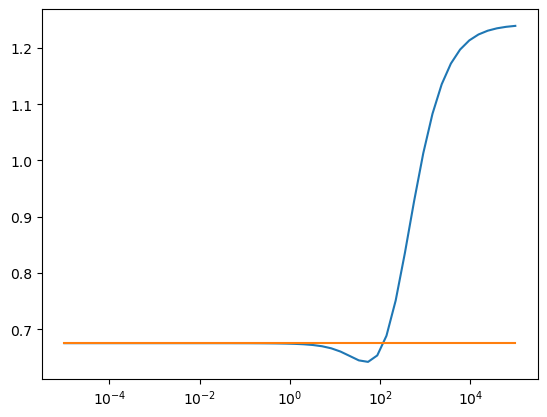

In [49]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas , erros , [10**-5 , 10**5] , [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show

In [50]:
np.argmin(erros)

33

In [52]:
erros[np.argmin(erros)]

0.6421149102590752

In [55]:
alphas[35]

138.9495494373139

<function matplotlib.pyplot.show(close=None, block=None)>

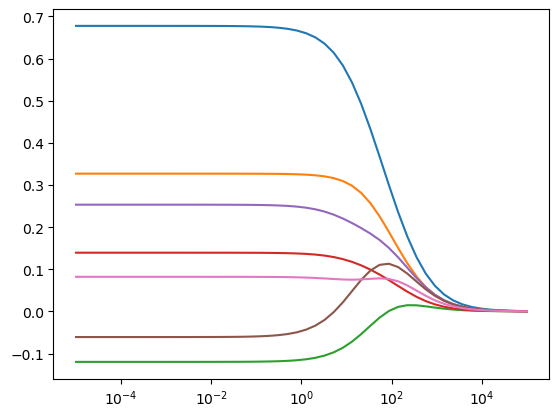

In [56]:
ax = plt.gca()
ax.plot(alphas , coefs)
ax.set_xscale('log')
plt.show